In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1630


<Axes: xlabel='Time'>

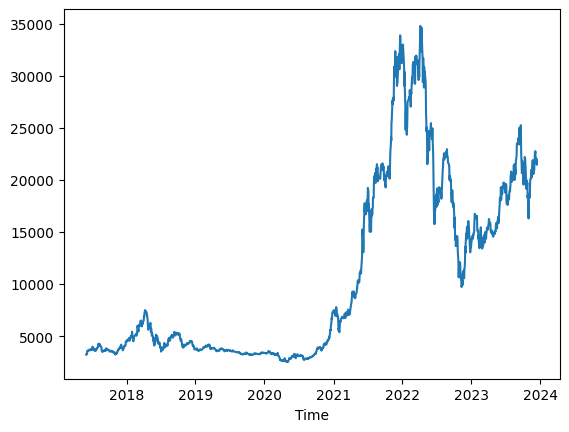

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
# Preprocessing
df = VND['Close']
df=df.reset_index()
df['Lag1'] = range(0, 1630)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)
df = df.dropna()
df

,Time,Close,Lag1,Lag2,Lag3
2,2017-06-05,3280,2,1.0,0.0
3,2017-06-06,3320,3,2.0,1.0
4,2017-06-07,3590,4,3.0,2.0
5,2017-06-08,3540,5,4.0,3.0
6,2017-06-09,3560,6,5.0,4.0
...,...,...,...,...,...
1625,2023-12-11,21950,1625,1624.0,1623.0
1626,2023-12-12,22050,1626,1625.0,1624.0
1627,2023-12-13,21600,1627,1626.0,1625.0
1628,2023-12-14,21450,1628,1627.0,1626.0


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
#4. Training process
x_train = np.array([train_data['Lag1'],train_data['Lag2'], train_data['Lag3']]).reshape(-1, 3)
y_train = np.array(train_data['Close'])

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array([test_data['Lag1'],test_data['Lag2'], test_data['Lag3']]).reshape(-1, 3)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
y_pred

array([11685.2593515 , 11711.48845496, 11737.71755843, 11763.9466619 ,
       11790.17576537, 11816.40486884, 11842.6339723 , 11868.86307577,
       11895.09217924, 11921.32128271, 11947.55038618, 11973.77948965,
       12000.00859311, 12026.23769658, 12052.46680005, 12078.69590352,
       12104.92500699, 12131.15411045, 12157.38321392, 12183.61231739,
       12209.84142086, 12236.07052433, 12262.2996278 , 12288.52873126,
       12314.75783473, 12340.9869382 , 12367.21604167, 12393.44514514,
       12419.6742486 , 12445.90335207, 12472.13245554, 12498.36155901,
       12524.59066248, 12550.81976594, 12577.04886941, 12603.27797288,
       12629.50707635, 12655.73617982, 12681.96528329, 12708.19438675,
       12734.42349022, 12760.65259369, 12786.88169716, 12813.11080063,
       12839.33990409, 12865.56900756, 12891.79811103, 12918.0272145 ,
       12944.25631797, 12970.48542143, 12996.7145249 , 13022.94362837,
       13049.17273184, 13075.40183531, 13101.63093878, 13127.86004224,
      

In [7]:
# 6. 60 days prediction
last_index =  len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
range_arr_1 = np.array(range(last_index+1, last_index+61))
range_arr_2 = np.array(range(last_index, last_index+60))
range_arr_3 = np.array(range(last_index-1, last_index+59))

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array([range_arr_1,
                          range_arr_2, 
                          range_arr_3]).reshape(-1, 3)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[15951.86018231 15978.08928578 16004.31838925 16030.54749272
 16056.77659619 16083.00569965 16109.23480312 16135.46390659
 16161.69301006 16187.92211353 16214.15121699 16240.38032046
 16266.60942393 16292.8385274  16319.06763087 16345.29673434
 16371.5258378  16397.75494127 16423.98404474 16450.21314821
 15943.11714782 15969.34625129 15995.57535476 16021.80445823
 16048.0335617  16074.26266516 16100.49176863 16126.7208721
 16152.94997557 16179.17907904 16205.40818251 16231.63728597
 16257.86638944 16284.09549291 16310.32459638 16336.55369985
 16362.78280331 16389.01190678 16415.24101025 16441.47011372
 15934.37411333 15960.6032168  15986.83232027 16013.06142374
 16039.29052721 16065.51963068 16091.74873414 16117.97783761
 16144.20694108 16170.43604455 16196.66514802 16222.89425148
 16249.12335495 16275.35245842 16301.58156189 16327.81066536
 16354.03976882 16380.26887229 16406.49797576 16432.72707923]


In [8]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8620.64897601729
Testing MAPE: 28.252905454954035
Testing MAE: 6551.341281803125
MSLR:  0.20431147528581542


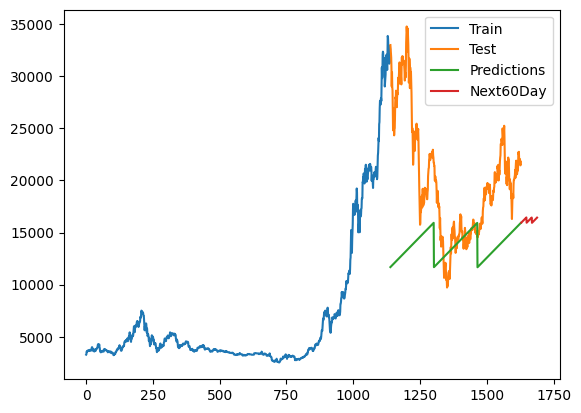

In [9]:
train_range = range(train_size)
test_range = range(train_size, train_size+test_size+1)

# 8.Visualize the result
plt.plot(train_range, train_data['Close'])
plt.plot(test_range, test_data['Close'])
plt.plot(test_range, y_pred)
plt.plot(range_arr_1,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()